In [1]:
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  #MacOS自带字体
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import datetime
sns.set()

In [2]:
df = pd.read_csv('data/flights.csv')

In [3]:
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [4]:
def monthToNum(month):
    return{
        'January':1,
        'February':2,
        'March':3,
        'April':4,
        'May':5,
        'June':6,
        'July':7,
        'August':8,
        'September':9,
        'October':10,
        'November':11,
        'December':12
    }[month]
df['month_num'] = df['month'].map(monthToNum)
df['month_num'].head()

0    1
1    2
2    3
3    4
4    5
Name: month_num, dtype: int64

In [5]:
df['day'] = df.apply(lambda row: datetime.datetime(row['year'],row['month_num'],1) ,axis=1)
df['day']

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: day, Length: 144, dtype: datetime64[ns]

In [6]:
passengers = Series(df['passengers'].values,index=df['day'].values)

In [7]:
passengers.head()

1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
dtype: int64

<AxesSubplot: >

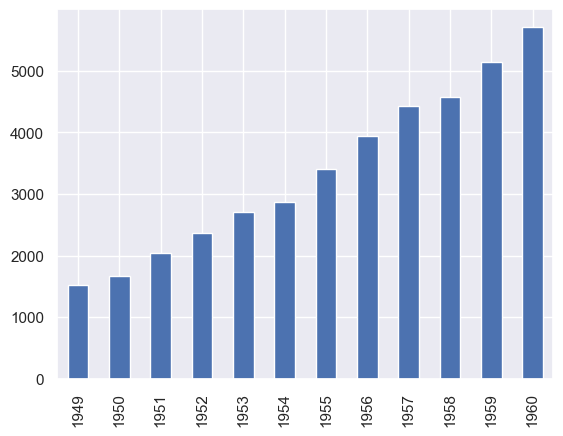

In [8]:
passengers.groupby(passengers.index.year).sum().plot(kind='bar')

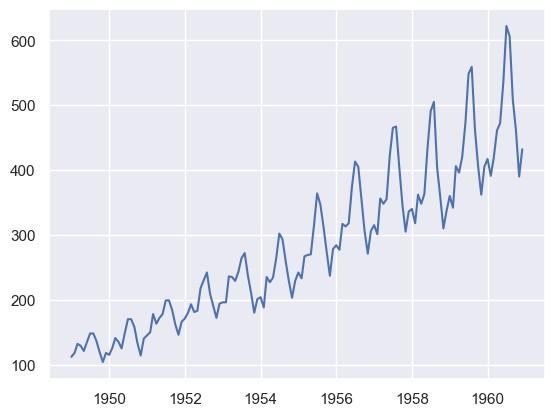

In [9]:
plt.plot(passengers.index, passengers.values)